In [1]:
from tensorflow import keras
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('datasets/train.csv')
train

,Unnamed: 0,image_url,humour,sarcastic,offensive,motivational,overall,ocr
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,not_offensive,not_motivational,neutral,Relationship status.\nSingle\nMarried\nIt's co...
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,slight,not_motivational,neutral,Bernie or REAGAN?\nBe informed. Compare them o...
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,not_offensive,not_motivational,positive,I HEAR SOMETHING\nBetter run a mile\nOMG RAJ?\...
3,3,https://preview.redd.it/iwcz3o2niix61.jpg?widt...,very_funny,twisted_meaning,not_offensive,not_motivational,positive,Redditors Visiting IG memepages\n*dies from cr...
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,not_funny,not_sarcastic,very_offensive,not_motivational,negative,"Samajh nahi aaya Par sun ke acabo,\nBUDGET SPE..."
...,...,...,...,...,...,...,...,...
6995,6995,https://preview.redd.it/3c7iiijlg9d61.jpg?widt...,hilarious,general,slight,not_motivational,negative,$14 y/o nibbi*\n*16 y/o nibba*\n*20 y/o single...
6996,6996,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,very_twisted,hateful_offensive,not_motivational,negative,I DON'T HAVE A PROBLEM WITH\nIMMIGRATION\nIF W...
6997,6997,https://encrypted-tbn0.gstatic.com/images?q=tb...,hilarious,not_sarcastic,not_offensive,not_motivational,positive,"Como umbalin\nHey Alia,\nWhat is the\nOpposite..."
6998,6998,https://encrypted-tbn0.gstatic.com/images?q=tb...,hilarious,general,very_offensive,motivational,negative,baby kya kr rhe ho?\ntumhara favorite football...


In [3]:
train.isnull().sum()

Unnamed: 0      0
image_url       0
humour          0
sarcastic       0
offensive       0
motivational    0
overall         0
ocr             0
dtype: int64

In [4]:
import cv2
def read_image(path):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(224,224))
    return img

In [5]:
img1=read_image(os.path.join('.','datasets','trainimages','9.jpg'))

In [6]:
img1.shape

(224, 224, 3)

In [7]:
X=[]
for i in range(3000):
    img=read_image(os.path.join('.','datasets','trainimages',str(i)+'.jpg'))
    X.append(img)
    

In [8]:
X=np.array(X)
X=X/255

In [9]:
X

array([[[[0.99607843, 0.99607843, 0.99607843],
         [0.96078431, 0.96078431, 0.96078431],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.82352941, 0.82352941, 0.82352941]],

        [[1.        , 1.        , 1.        ],
         [0.98823529, 0.98823529, 0.98823529],
         [0.94509804, 0.94509804, 0.94509804],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.81960784, 0.81960784, 0.81960784]],

        [[0.98039216, 0.98039216, 0.98039216],
         [0.99215686, 0.99215686, 0.99215686],
         [0.98039216, 0.98039216, 0.98039216],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.82352941, 0.82352941, 0.82352941]],

        ...,

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]

In [10]:
train['overall'].value_counts()

overall
neutral          2970
positive         1902
negative         1454
very_positive     373
very_negative     301
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(train['overall'])

In [12]:
y=pd.Series(y)
y.value_counts()

1    2970
2    1902
0    1454
4     373
3     301
Name: count, dtype: int64

In [13]:
len(y.unique())

5

In [14]:
cnn= keras.models.Sequential([
    keras.layers.Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(len(y.unique()),activation='softmax')

])

c:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:

y=y[:3000]

In [17]:
len(y)

3000

In [19]:
cnn.fit(X,y,epochs=10)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.4194 - loss: 1.3353
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.4366 - loss: 1.2909
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.5752 - loss: 1.0380
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.7685 - loss: 0.5968
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9181 - loss: 0.2789
Epoch 6/10
19/94 ━━━━━━━━━━━━━━━━━━━━ 2:00 2s/step - accuracy: 0.9806 - loss: 0.1042

KeyboardInterrupt: 

In [20]:
cnn.predict(X)

94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 307ms/step


array([[1.6465420e-03, 9.9816847e-01, 1.8139147e-04, 3.6067872e-06,
        2.1258957e-09],
       [1.7740605e-05, 9.8562837e-01, 4.0179249e-05, 1.4313371e-02,
        3.8639848e-07],
       [9.3466474e-04, 6.3059162e-03, 9.9190861e-01, 1.6233383e-04,
        6.8849861e-04],
       ...,
       [8.9794700e-04, 9.9125224e-01, 5.2610682e-03, 2.5883131e-03,
        4.1427555e-07],
       [5.5557240e-02, 2.7772911e-02, 9.1414970e-01, 1.1955346e-03,
        1.3245818e-03],
       [4.7624270e-03, 9.9523759e-01, 1.4627326e-08, 2.2018066e-08,
        5.2415814e-13]], shape=(3000, 5), dtype=float32)

In [21]:
test=[]
for i in range(500):
    img=read_image(os.path.join('.','datasets','testimages',str(i)+'.jpg'))
    test.append(img)

In [23]:
te=pd.read_csv('datasets/test.csv')
te

,Unnamed: 0,image_url,ocr
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,#Lockdown4\nmakatteun\nbura lagega but there n...
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,पोस्ट करने वाले\n@alayarwt\nCOBAROK\nHUME KOI ...
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,Girlfriend\nFacebook\nMe\nPubg\nMemes\nInsta\n...
3,3,https://encrypted-tbn0.gstatic.com/images?q=tb...,TELL THEM THEY CAN OPEN P\nMERS ARENALDEN\nE\n...
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,What about my Media attention\npapa?\nAa gaye ...
...,...,...,...
1495,1495,https://encrypted-tbn0.gstatic.com/images?q=tb...,Aham Brahmasmi.\nNETFLIX
1496,1496,https://encrypted-tbn0.gstatic.com/images?q=tb...,SACRED GAMES\nALLEGEDLY INSULTED\nEX PM RAJEEV...
1497,1497,https://encrypted-tbn0.gstatic.com/images?q=tb...,hp\nSTUDIO\nR\nPVR\nREMAS\nThe Sharma\nGaitond...
1498,1498,https://encrypted-tbn0.gstatic.com/images?q=tb...,am going to create\nan misunderstanding that i...


In [24]:
test=np.array(test)


<Figure size 640x480 with 0 Axes>

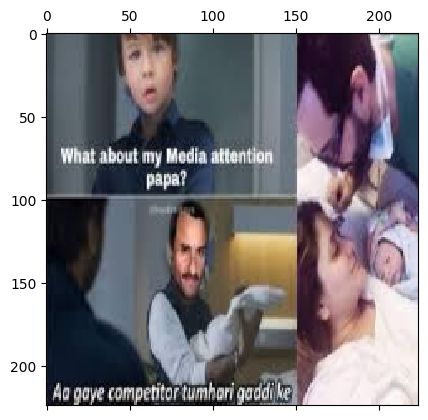

In [25]:
plt.gray()
plt.matshow(test[4])

In [26]:
import numpy as np

p=cnn.predict(X)


94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 299ms/step


In [27]:
p

array([[1.6465420e-03, 9.9816847e-01, 1.8139147e-04, 3.6067872e-06,
        2.1258957e-09],
       [1.7740605e-05, 9.8562837e-01, 4.0179249e-05, 1.4313371e-02,
        3.8639848e-07],
       [9.3466474e-04, 6.3059162e-03, 9.9190861e-01, 1.6233383e-04,
        6.8849861e-04],
       ...,
       [8.9794700e-04, 9.9125224e-01, 5.2610682e-03, 2.5883131e-03,
        4.1427555e-07],
       [5.5557240e-02, 2.7772911e-02, 9.1414970e-01, 1.1955346e-03,
        1.3245818e-03],
       [4.7624270e-03, 9.9523759e-01, 1.4627326e-08, 2.2018066e-08,
        5.2415814e-13]], shape=(3000, 5), dtype=float32)

In [28]:
p.shape

(3000, 5)

In [29]:
p=p.argmax(axis=1)


In [30]:
p

array([1, 1, 2, ..., 1, 2, 1], shape=(3000,))

In [31]:
y[:15]

0     1
1     1
2     2
3     2
4     0
5     1
6     1
7     3
8     0
9     0
10    2
11    2
12    0
13    2
14    1
dtype: int64

In [32]:
print(classification_report(p,y))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       600
           1       0.97      0.99      0.98      1252
           2       0.99      0.95      0.97       874
           3       1.00      0.99      1.00       126
           4       0.99      0.99      0.99       148

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [33]:
img=read_image(os.path.join('.','datasets','hi.jpg'))

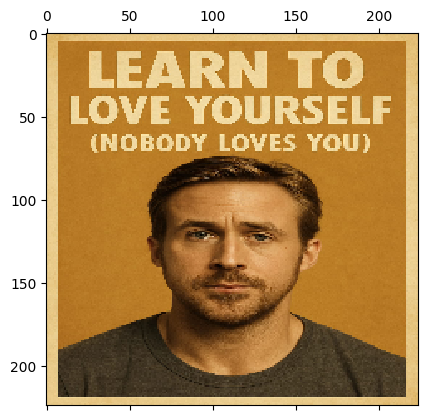

In [34]:
plt.matshow(img)

In [35]:
img.shape

(224, 224, 3)

In [36]:
np.argmax(cnn.predict(np.expand_dims(img, axis=0)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


np.int64(2)

In [37]:
def predict(path):
    img=read_image(path)
    plt.matshow(img)
    img=np.expand_dims(img,axis=0)
    pred=cnn.predict(img)
    pred=pred.argmax(axis=1)
    return le.inverse_transform(pred)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
neutral


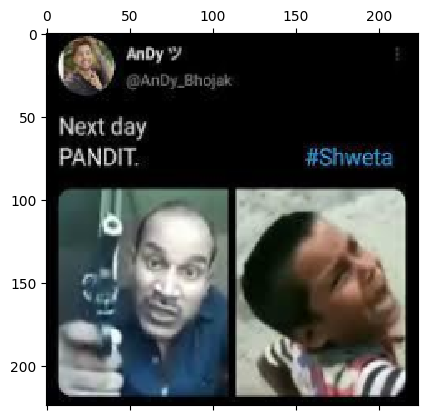

In [41]:
print(predict(os.path.join('.','datasets','testimages','889.jpg')))